# Exercise 6, answers

## Task 1

The set of Pareto optimal solutions is $\{(t,1-t):t\in[0,1]\}$.

Let us denote set of Pareto optimal solutions by $PS$ and show that $PS=\{(t,1-t):t\in[0,1]\}$.

$PS\supset\{(t,1-t):t\in[0,1]\}$:

Let's assume that there exists $t\in[0,1]$, for which $(t,1-t)$ is not Pareto optimal. Then there exists $x=(x_1,x_2)\in\mathbb R^2$ and $t\in[0,1]$ such that

$$
\left\{
\begin{align}
\|x-(1,0)\|^2<\|(t,1-t)-(1,0) \|^2,\text{ and}\\
\|x-(0,1)\|^2\leq\|(t,1-t)-(0,1) \|^2
\end{align}
\right.
$$

or

$$
\left\{
\begin{align}
\|x-(1,0)\|^2\leq\|(t,1-t)-(1,0) \|^2,\text{ and}\\
\|x-(0,1)\|^2<\|(t,1-t)-(0,1)\|^2.
\end{align}
\right.
$$

But in both cases

$$
\sqrt{2} = \|(1,0)-(0,1)\|\\
\leq \|(1,0)-x\|+\|x-(0,1)\|\\
< \|(t,1-t)-(1,0) \|+\|(t,1-t)-(0,1) \|\\
= \|(1,0)-(0,1)\| =\sqrt{2}.
$$
because the point $(t,1-t)$ is on the straight line from $(1,0)$ to $(0,1)$.

Thus, neither one of the requirements of non-Pareto optimality can hold. Thus, the point is Pareto optimal.



$PS\subset\{(t,1-t):t\in[0,1]\}$:

Let's assume a Pareto optimal solution $x$. This follows from the triangle inequality.

**Therefore, $PS=\{(t,1-t):t\in[0,1]\}$**

## Task 2

Ideal:

To solve

$$
\min \|x-(1,0)\|^2\\
\text{s.t. }x\in \mathbb R^2.
$$

The solution of this problem is naturally $x = (1,0)$ and the minimum is $0$. Minimizing the second objective give $x=(0,1)$ and the minimum is again $0$. Thus, the ideal is $(0,0)$.

Now, the problem has just two objectives and thus, we get the components of the nadir by optimizing

$$
\max f_1(x)\\
\text{s.t. }f_2(x)\leq z^{ideal}_2
$$

and

$$
\max f_2(x)\\
\text{s.t. }f_1(x)\leq z^{ideal}_1.
$$

The solution of this problem is Pareto optimal because of the epsilon constraint method and also because the other one of the objectives is at the minimum and the other one cannot be grown with growing the other. Thus, the components of the nadir are at least the optimal values of the above optimization problems.

On the other hand, the components of the nadir have to be at most the optimal values of the above optimization problems, because if this was not the case, then the solution would not be Pareto optimal.

By solving these optimization problems, we get nadir (2,2).

## Task 3

In [1]:
# norm squared
def prob(x):
    return [(x[0]-1)**2+x[1]**2,x[0]**2+(x[1]-1)**2]

In [2]:
# from the lectures
import numpy as np
import ad
from scipy.optimize import minimize
def weighting_method(f,w):
    points = []
    for wi in w:
        res=minimize(
            #weighted sum
            lambda x: sum(np.array(wi)*np.array(f(x))), 
            [0,0], jac=ad.gh(lambda x: sum(np.array(wi)*np.array(f(x))))[0],
            options = {'disp':False})
        points.append(res.x)
    return points

In [3]:
# objective functions
def prob(x):
    return [(x[0]-1)**2+x[1]**2,x[0]**2+(x[1]-1)**2]

In [4]:
w = np.random.random((500,2)) #500 random weights
wn = w
# normalization
for i in range(len(w)):
    s = sum(w[i])
    for j in range(2):
        wn[i][j] = w[i][j]/s
repr_ws = weighting_method(prob,wn)

**Plot the solutions in the objective space**

In [5]:
import matplotlib.pyplot as plt
def visualize_representation(func,repr):
    f_repr_ws = [prob(repri) for repri in repr]
    fig = plt.figure()
    plt.scatter([z[0] for z in f_repr_ws],[z[1] for z in f_repr_ws])
    return plt

<module 'matplotlib.pyplot' from 'C:\\devel\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

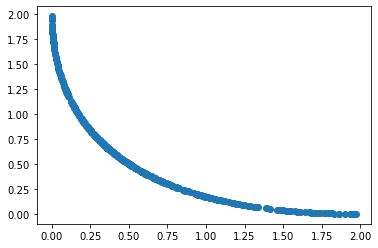

In [6]:
visualize_representation(prob,repr_ws)

**Plot the solutions in the decision space**

In [7]:
import matplotlib.pyplot as plt
def visualize_decisions(repr):
    fig = plt.figure()
    plt.scatter([x[0] for x in repr],[x[1] for x in repr])
    return plt

<class 'list'>


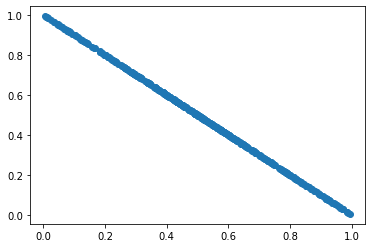

In [8]:
print(type(repr_ws))
visualize_decisions(repr_ws).show()

**What do we notice?**

In this problem, the weighting method works. This is because the objective functions are convex.

Working here means that the method produces an even representation of the whole Pareto optimal set.

## Two different Tasks have been given as Task 4 in MOODLE and GitHub. It does not matter which you answered. Here, you can find answers to both.

## Task 4 (GitHub-weighting method)

### Part a)

Let's assume the opposite that $x^*$ is an optimal solution to 
$$
\min \sum_{i=1}^kw_if_i(x)\\
\text{s.t. }x\in S
$$
and that the solution $x^*$ is not Pareto optimal.

If $x^*$ is not Pareto optimal, then there exists $x'\in S$ such that

$$
\left\{
\begin{align}
f_i(x')\leq f_i(x^*) \text{ for all }i=1,\ldots,k,\text{ and}\\
f_j(x')< f_j(x^*) \text{ for some }j=1,\ldots,k.
\end{align}
\right.
$$

But this means that

$$
\begin{align}
\sum_{i=1}^kw_if_i(x') &= \sum_{i\neq j}w_if_i(x')+w_jf_j(x')\\
&<\sum_{i\neq j}w_if_i(x^*)+w_jf_j(x^*)\\
&=\sum_{i=1}^kw_if_i(x^*).
\end{align}
$$

Thus, $x^*$ is not an optimal solution to the problem in the weighting method. This means that $x^*$ must be Pareto optimal.

### Part b)

Let's again assume that a solution $x^*$ is an optimal solution to the problem for all $j=1,\ldots,k$ and $\epsilon = f(x^*)$, but it is not Pareto optimal.

If $x^*$ is not Pareto optimal, then there exists $x'\in S$ such that

$$
\left\{
\begin{align}
f_i(x')\leq f_i(x^*) \text{ for all }i=1,\ldots,k,\text{ and}\\
f_j(x')< f_j(x^*) \text{ for some }j=1,\ldots,k.
\end{align}
\right.
$$

The first inequality means that $x'$ is a feasible solution to the epsilon constraint problem for "$j=j$" (meaning that the index $j$ is the same in the definition of Pareto optimality and the definition of the epsilon constraint method).

Furthermore, the second stricth inequality says that the value of the objective at this solutions $x'$ is better than the value at the solutions $x^*$. This means that it is not Pareto optimal.

## Task 4 (MOODLE-achievement scalarizing)

### Part a)

Let's assume that a solution $x^*$ is an optimal solution to the achievement scalarizing problem, but it is not Pareto optimal. 

If $x^*$ is not Pareto optimal, then there exists $x'\in S$ such that
$$
\left\{
\begin{align}
f_i(x')\leq f_i(x^*) \text{ for all }i=1,\ldots,k,\text{ and}\\
f_j(x')< f_j(x^*) \text{ for some }j=1,\ldots,k.
\end{align}
\right.
$$

Now,
$$
\max_{i=1}^k(f_i(x^*)-z^{ref}_i)+\rho\sum_{i=1}^kf_i(x^*) \geq \max_{i=1}^k(f_i(x')-z^{ref}_i)+\rho\sum_{i=1}^kf_i(x^*)\\
>  \max_{i=1}^k(f_i(x')-z^{ref}_i)+\rho\sum_{i=1}^kf_i(x')
$$
where we used just the first inequality first, and then we used the previous proof from weighting method.

This means again that if the solution $x^*$ is not Pareto optimal, then it cannot be an optimal solution to the achievement scalarizing function.

### Part b)

Assume a Pareto optimal $x^*$. Now, we choose $z^{ref} = f(x^*)$. Let's have any solutions $x\in S$. Then,
$$
\max_{i=1\ldots,k}(f_i(x)-z_i^{ref})+\rho\sum_{i=1}^kf_i(x) = \max_{i=1\ldots,k}(f_i(x)-f_i(x^*))
\geq 0,
$$
because $\rho=0$ and $x^*$ is Pareto optimal and, thus, at least one of the objectives needs to be greater or equal (if this was not the case, the solution $x^*$ would not be Pareto optimal).

But now,
$$
\max_{i=1\ldots,k}(f_i(x^*)-z_i^{ref})+\rho\sum_{i=1}^kf_i(x^*)= \max_{i=1\ldots,k}(f_i(x^*)-f_i(x^*))+\rho\sum_{i=1}^kf_i(x^*) \\
= 0
$$
trivially. This means that the Pareto optimal solution $x^*$ is an optimal solution to the achievement scalarizing problem. 